In [239]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt


college = pd.read_csv("https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/unsupervised-learning/data/College.csv")

arrests = pd.read_csv("https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/unsupervised-learning/data/USArrests.csv")

## Principal Components Analysis

Perform PCA analysis on the college dataset and plot the first two principal components. Describe the results.

1) What variables appear strongly correlated on the first principal component?

2) What about the second principal component?

Be sure to remove any variables that are not numeric - PCA only works on numeric variables.



In [251]:
college_data = college.loc[:,college.columns != 'Private']

college_data_array = college_data.values #creates arrays for each sample

college_private = college.loc[:,college.columns == 'Private'].values


In [257]:
pca2 = PCA().fit(college_data)

df = pd.DataFrame(pca2.components_)
df.columns = college_data.columns
df = df.transpose()
df = df.loc[:,'0':'1']
df.columns = ['PC1', 'PC2']

factors = df.index


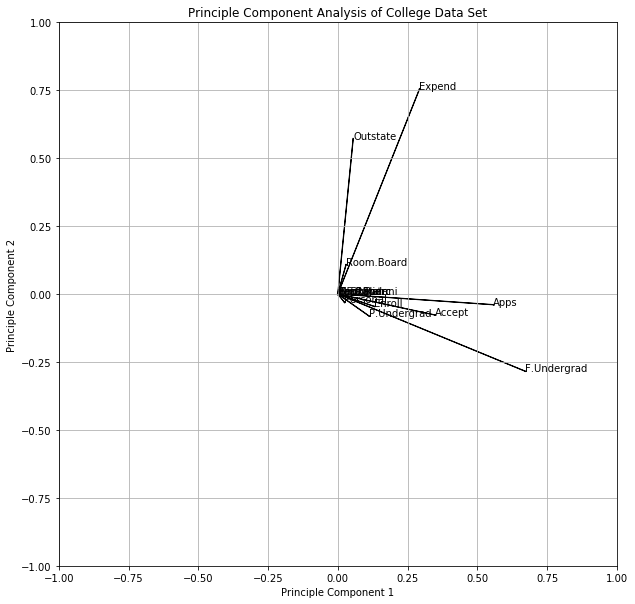

In [253]:
%matplotlib inline

x = df['PC1']
y = df['PC2']

plt.figure(figsize=(10,10))
plt.ylim(ymax = 1, ymin = -1)
plt.xlim(xmax = 1, xmin = -1)

for i in range(0,len(df)):
    plt.arrow(0, 0, df['PC1'][i], df['PC2'][i])

for factor in factors:
    plt.annotate(factor,(df['PC1'][factor], df['PC2'][factor]))
    
plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.title("Principle Component Analysis of College Data Set")
plt.grid(True)

Apps and F.Undergrad appear to be the components most strongly correlated with the first principle components, while for the second principle component, it appears that Outstate and Expend are the most highly correlated

### Calculate the cumulative proportion of variance explained by all the principal components (see 10.2.3 in ISLR). Approximately how much of the variance in College is explained by the first two principal components?

Approximately 87.1% percent is explaind by the first two principle components


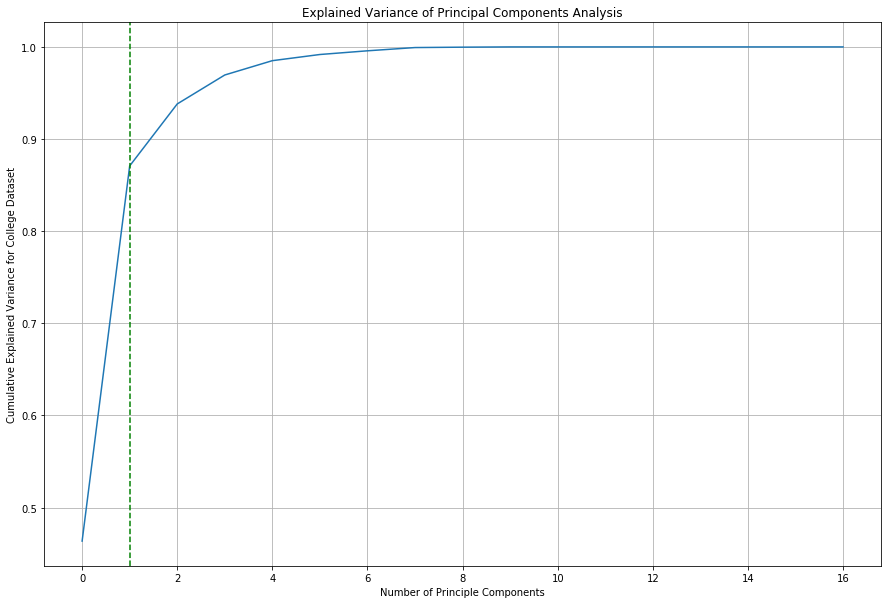

In [254]:
var_ratio =np.cumsum(pca2.explained_variance_ratio_)

num_comp = range(1,len(df))

a = list(zip(num_comp, var_ratio))
plt.figure(figsize = (15,10))
plt.plot(var_ratio)
plt.ylabel("Cumulative Explained Variance for College Dataset")
plt.xlabel("Number of Principle Components")
plt.title("Explained Variance of Principal Components Analysis")
plt.axvline(x = 1, color = 'g', linestyle = '--')
plt.grid(True)

print("Approximately {}% percent is explaind by the first two principle components".format(round(var_ratio[1],3)*100))